In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
import logging

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
    
aequ_dir = "/mnt/c/Users/jan.zill/code/aequilibrae"
if aequ_dir not in sys.path:
    sys.path.append(aequ_dir)

from aequilibrae import logger  # noqa: E402

import utils

/mnt/c/Users/jan.zill/code/aequilibrae/aequilibrae/parameters.py:51: UserWarning: No pre-existing parameter file exists for this project. Will use default
  warn('No pre-existing parameter file exists for this project. Will use default')
/mnt/c/Users/jan.zill/code/aequilibrae/aequilibrae/parameters.py:51: UserWarning: No pre-existing parameter file exists for this project. Will use default
  warn('No pre-existing parameter file exists for this project. Will use default')


In [4]:
stdout_handler = logging.StreamHandler(sys.stdout)
formatter = logging.Formatter("%(asctime)s;%(name)s;%(levelname)s ; %(message)s")
stdout_handler.setFormatter(formatter)
logger.addHandler(stdout_handler)

In [5]:
code_dir = "/mnt/c/Users/jan.zill/code"
tntp_dir = os.path.join(code_dir, "TransportationNetworks_aequilibrae")
scenario = "Anaheim" #"Berlin-Center"#"Barcelona" #
folder = os.path.join(tntp_dir, scenario)

if scenario == "Berlin-Center":
    link_file =  "berlin-center_net_clean.tntp" # DUPLICATE NODES REMOVED  "berlin-center_net_clean_bpr_altered.tntp" #
    trip_file =  "berlin-center_trips.tntp"
else:
    link_file =  f"{scenario}_net.tntp"
    trip_file =  f"{scenario}_trips.tntp"
    
# best_known_solution = list(filter(lambda x: "_flow.tntp" in x, os.listdir(folder)))
# if len(best_known_solution) == 1:
#     sol_file = best_known_solution[0]
# else:
#     sol_file = None
if scenario == "Anaheim":
    best_sol = pd.read_csv(os.path.join(folder, f"{scenario}_flow.tntp"), sep='\t', skiprows=5).rename(columns={"Tail ": "a_node", "Head ": "b_node", "Volume ": "flow_best"}).drop(columns=['~ ', ': ', '; ', 'Cost '])
    
if scenario == "Barcelona":
     best_sol = pd.read_csv(os.path.join(folder, f"{scenario}_flow.tntp"), sep='\t').rename(columns={"From ": "a_node", "To ": "b_node", "Volume ": "flow_best"}).drop(columns=['Cost '])

In [7]:
block_centroids = True
r_gap = 1e-5

In [8]:
%%time
do_parallel = False
if do_parallel:
    method = "bush-based-parallel"
else:
    method = "bush-based"
path_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method=method, block_centroids=block_centroids, rgap=r_gap)

2020-12-09 09:11:00,292;aequilibrae;INFO ; bush-based sequential Assignment STATS


/mnt/c/Users/jan.zill/code/aequilibrae/aequilibrae/parameters.py:51: UserWarning: No pre-existing parameter file exists for this project. Will use default
  warn('No pre-existing parameter file exists for this project. Will use default')


2020-12-09 09:11:00,375;aequilibrae;INFO ;  Initialised data structures, num nodes = 416, num links = 914
2020-12-09 09:11:00,450;aequilibrae;INFO ;  0th iteration done, cost = 1296185.75
2020-12-09 09:11:02,171;aequilibrae;INFO ; Iteration 1, computed gap: 0.0020655976391339426, computed objective: 1287869.375
2020-12-09 09:11:03,916;aequilibrae;INFO ; Iteration 2, computed gap: 0.00010550308297574418, computed objective: 1286209.75
2020-12-09 09:11:05,603;aequilibrae;INFO ; Iteration 3, computed gap: 1.4592302448046546e-05, computed objective: 1286160.125
2020-12-09 09:11:07,303;aequilibrae;INFO ; Iteration 4, computed gap: 7.937644360911378e-06, computed objective: 1286154.25
2020-12-09 09:11:08,993;aequilibrae;INFO ; Iteration 5, computed gap: 3.618895446977355e-06, computed objective: 1286153.625
2020-12-09 09:11:10,709;aequilibrae;INFO ; Iteration 6, computed gap: 2.30993420702319e-06, computed objective: 1286153.375
2020-12-09 09:11:12,495;aequilibrae;INFO ; Iteration 7, compute

In [8]:
%%time
bfw_rgap = r_gap #1e-5 #
bfw_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bfw", block_centroids=block_centroids, rgap=bfw_rgap)

bfw Assignment STATS
Iteration, RelativeGap, stepsize
1,inf,1.0
2,0.01813536336911382,0.25610159320627746
# Alert: Adding 0.3333333333333333 to stepsize to make it non-zero
3,0.0036265961074987314,0.3333333333333333
# Alert: Adding 0.25 to stepsize to make it non-zero
4,0.002300502121447229,0.25
# Alert: Adding 0.2 to stepsize to make it non-zero
5,0.0016660925434689557,0.2
# Alert: Adding 0.16666666666666666 to stepsize to make it non-zero
6,0.0013674148395812515,0.16666666666666666
# Alert: Adding 0.14285714285714285 to stepsize to make it non-zero
7,0.001152166503599817,0.14285714285714285
# Alert: Adding 0.125 to stepsize to make it non-zero
8,0.0009970861455203498,0.125
# Alert: Adding 0.1111111111111111 to stepsize to make it non-zero
9,0.0008651833121821925,0.1111111111111111
# Alert: Adding 0.1 to stepsize to make it non-zero
10,0.0007703386571853957,0.1
# Alert: Adding 0.09090909090909091 to stepsize to make it non-zero
11,0.0007020823903876606,0.09090909090909091
# Alert: Add

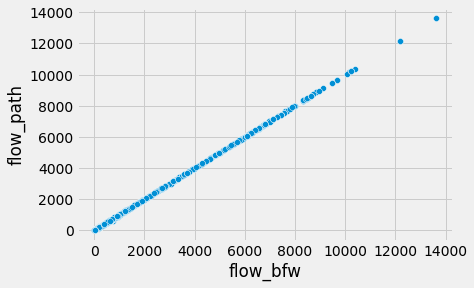

max diff in flow = 123.427
max rel diff in flow = 1.016%


,a_node,b_node,flow_bfw,flow_path,abs_change,rel_change
607,327,328,750.660952,627.233582,123.427370,0.164425
669,343,329,1216.344357,1314.427368,98.083011,0.080638
611,328,329,937.753684,839.672546,98.081137,0.104592
662,341,327,1049.363347,970.569702,78.793645,0.075087
663,341,342,614.924917,689.757874,74.832957,0.121694
667,342,343,434.688057,498.108704,63.420647,0.145899
503,298,134,317.992663,374.106812,56.114148,0.176464
508,299,298,630.692798,686.806763,56.113965,0.088972
515,301,300,372.594141,428.706787,56.112646,0.150600
520,302,301,372.594141,428.706787,56.112646,0.150600


In [9]:
full_result = bfw_res_.drop(columns=['time']).merge(path_res_.drop(columns=['time']), on=['a_node', 'b_node'], how='outer', suffixes=['_bfw', '_path'])
sns.scatterplot(data=full_result, x='flow_bfw', y='flow_path');

#full_result = full_result.merge(best_sol, on=['a_node', 'b_node'], how='outer')
#sns.scatterplot(data=full_result, x='flow_best', y='flow_path');

plt.show();
full_result['abs_change'] = np.abs(full_result.flow_bfw - full_result.flow_path)
full_result['rel_change'] = full_result['abs_change'] / full_result['flow_bfw']
print(f"max diff in flow = {full_result['abs_change'].max():.3f}")
print(f"max rel diff in flow = {full_result['rel_change'].abs().max():.3f}%")
display(full_result[['a_node', 'b_node', 'flow_bfw', 'flow_path', 'abs_change', 'rel_change']].sort_values(by=['abs_change'], ascending=False).head(15))
#display(full_result[['a_node', 'b_node', 'flow_bfw', 'flow_path', 'flow_best', 'abs_change', 'rel_change']].sort_values(by=['abs_change'], ascending=False).head(15))